In [1]:
import os
#import cv2
import h5py
import json
import keras
import random 
import imageio
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
#import plotly.express as px
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
Data = pd.read_csv('DsDnsPrScTch.csv') 
Data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Donor City,Donor State,...,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District,Teacher Prefix,Teacher First Project Posted Date
0,0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,West Jordan,Utah,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
1,1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23,Riverton,Utah,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
2,2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46,Riverton,Utah,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
3,3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04,Phoenix,Arizona,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
4,4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38,Salt Lake City,Utah,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19


In [3]:
Data["Teacher First Project Posted Date"]=pd.to_datetime(Data["Teacher First Project Posted Date"])
Data["Project Fully Funded Date"]=pd.to_datetime(Data["Project Fully Funded Date"])
Data["Project Expiration Date"]=pd.to_datetime(Data["Project Expiration Date"])
Data["Project Posted Date"]=pd.to_datetime(Data["Project Posted Date"])
Data["Donation Received Date"]=pd.to_datetime(Data["Donation Received Date"])
Data.dtypes

Unnamed: 0                                      int64
Project ID                                     object
Donation ID                                    object
Donor ID                                       object
Donation Included Optional Donation            object
Donation Amount                               float64
Donor Cart Sequence                             int64
Donation Received Date                 datetime64[ns]
Donor City                                     object
Donor State                                    object
Donor Is Teacher                               object
Donor Zip                                      object
School ID                                      object
Teacher ID                                     object
Teacher Project Posted Sequence                 int64
Project Type                                   object
Project Title                                  object
Project Essay                                  object
Project Short Description   

In [4]:
Data.dtypes

Unnamed: 0                                      int64
Project ID                                     object
Donation ID                                    object
Donor ID                                       object
Donation Included Optional Donation            object
Donation Amount                               float64
Donor Cart Sequence                             int64
Donation Received Date                 datetime64[ns]
Donor City                                     object
Donor State                                    object
Donor Is Teacher                               object
Donor Zip                                      object
School ID                                      object
Teacher ID                                     object
Teacher Project Posted Sequence                 int64
Project Type                                   object
Project Title                                  object
Project Essay                                  object
Project Short Description   

In [5]:
Data["Number of dates since posted"]=Data.loc[:,"Donation Received Date"]-Data.loc[:,"Project Posted Date"]

count    1.109992e+06
mean     3.098366e-01
std      3.482400e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.422162e-01
75%      5.096331e-01
max      2.550013e+00
Name: Raised funds to project cost ratio, dtype: float64
count    3217.000000
mean        1.077105
std         0.214475
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000027
max         2.550013
Name: Raised funds to project cost ratio, dtype: float64


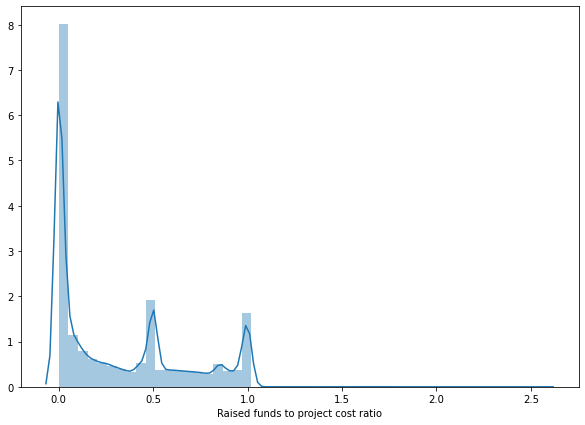

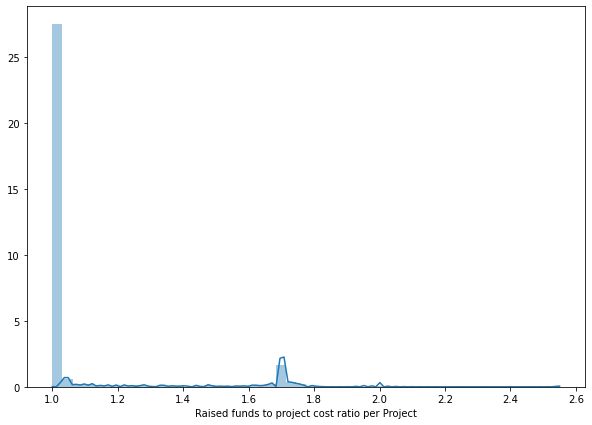

In [6]:
T=pd.Timedelta('30 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.001
y="Raised funds to project cost ratio"
q1 = Grouped_data[y].quantile(0)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.999
y="Raised funds to project cost ratio"
q1 = Grouped_data[y].quantile(range)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Project")
print(iqr.describe())
G30=Grouped_data

In [7]:
f30=pd.merge(Data,G30,on='Project ID')
f30.to_csv('/content/drive/My Drive/donorschoose/F30.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/donorschoose/F30.csv'

In [ ]:
T=pd.Timedelta('60 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Fund Ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.001
y="Fund Ratio"
q1 = Grouped_data[y].quantile(0)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Project")
print(iqr.describe())

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.999
y="Fund Ratio"
q1 = Grouped_data[y].quantile(range)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Project")
print(iqr.describe())
G30=Grouped_data

In [ ]:
T=pd.Timedelta('60 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Fund Ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.001
y="Fund Ratio"
q1 = Grouped_data[y].quantile(0)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Project")
print(iqr.describe())

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.999
y="Fund Ratio"
q1 = Grouped_data[y].quantile(range)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Project")
print(iqr.describe())
G30=Grouped_data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count    869931.000000
mean          0.555156
std           0.336339
min           0.000026
25%           0.254682
50%           0.500018
75%           0.888972
max           1.000061
Name: Fund Ratio, dtype: float64
count    871.000000
mean       1.349687
std        0.329470
min        1.000061
25%        1.026203
50%        1.231294
75%        1.700080
max        2.550013
Name: Fund Ratio, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



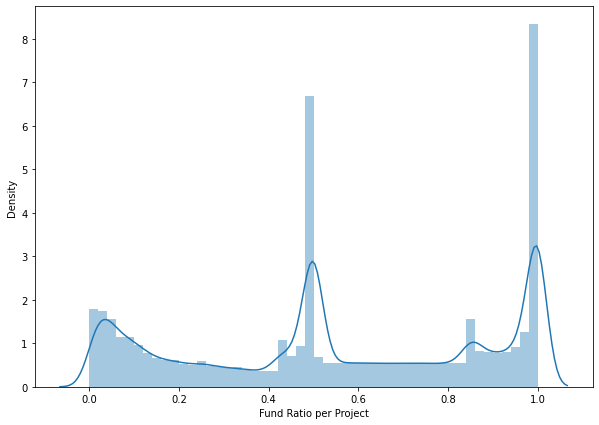

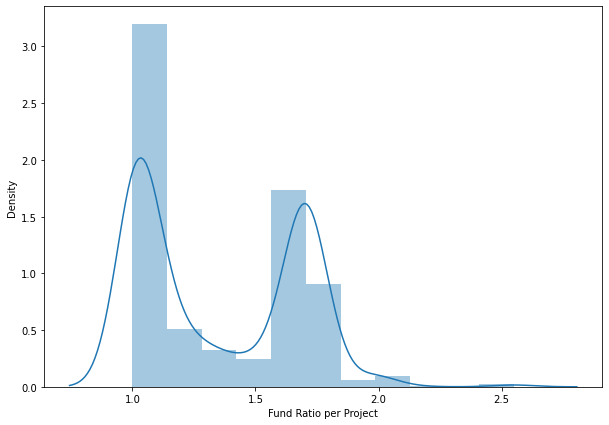

In [32]:
T=pd.Timedelta('120 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Fund Ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.001
y="Fund Ratio"
q1 = Grouped_data[y].quantile(0)
q3 = Grouped_data[y].quantile(1-range)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Project")
print(iqr.describe())

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.999
y="Fund Ratio"
q1 = Grouped_data[y].quantile(range)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Project")
print(iqr.describe())
G30=Grouped_data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count    806237.000000
mean        274.124149
std         316.947966
min           0.020000
25%          93.760000
50%         193.620000
75%         349.640000
max        5256.750000
Name: Donation Amount, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count       808.000000
mean       9529.915681
std        6618.513669
min        5270.400000
25%        6523.832500
50%        7820.525000
75%        9999.517500
max      108188.300000
Name: Donation Amount, dtype: float64


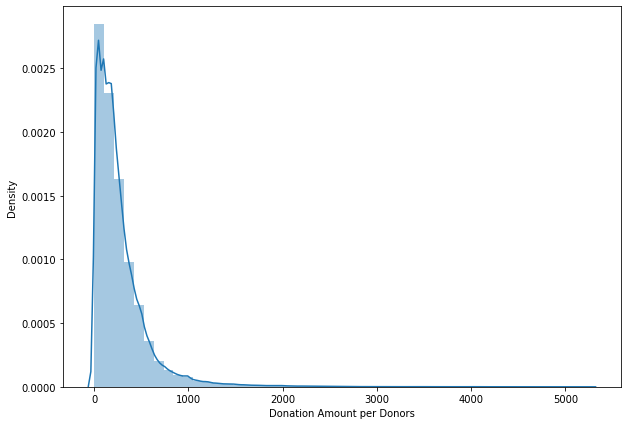

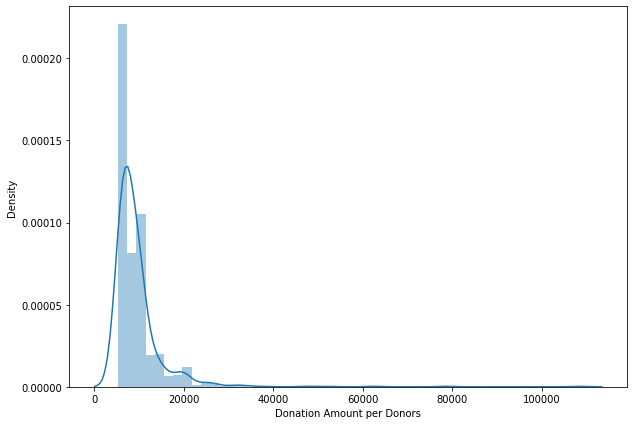

In [29]:
T=pd.Timedelta('60 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]

Grouped_data=sub_Data.groupby(["Project ID"]).sum()

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.001
y="Donation Amount"
q1 = Grouped_data[y].quantile(0)
q3 = Grouped_data[y].quantile(1-range)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Donors")
print(iqr.describe())

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.999
y="Donation Amount"
q1 = Grouped_data[y].quantile(range)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Donors")
print(iqr.describe())


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count    806237.000000
mean        274.124149
std         316.947966
min           0.020000
25%          93.760000
50%         193.620000
75%         349.640000
max        5256.750000
Name: Donation Amount, dtype: float64
count       808.000000
mean       9529.915681
std        6618.513669
min        5270.400000
25%        6523.832500
50%        7820.525000
75%        9999.517500
max      108188.300000
Name: Donation Amount, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



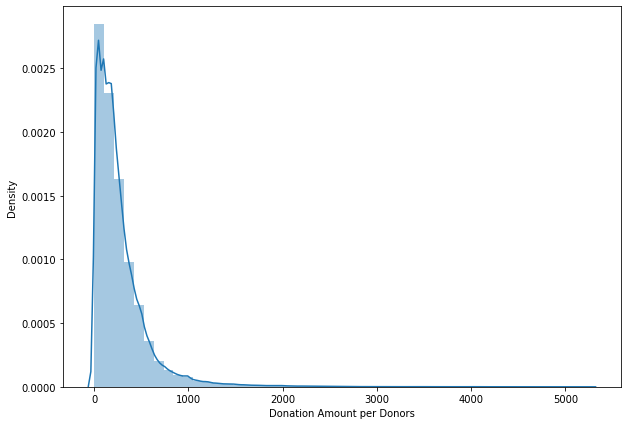

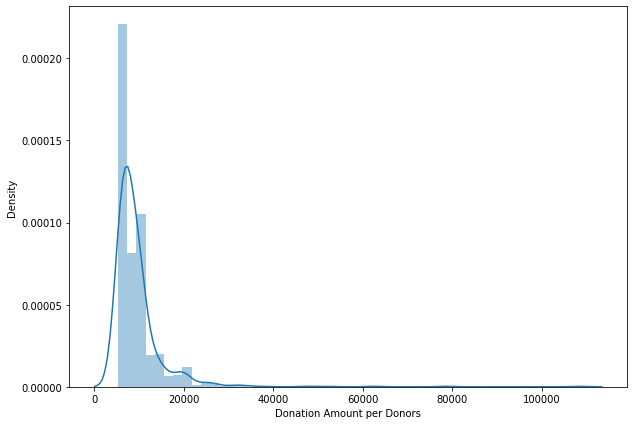

In [8]:
T=pd.Timedelta('60 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]

Grouped_data=sub_Data.groupby(["Project ID"]).sum()

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.001
y="Donation Amount"
q1 = Grouped_data[y].quantile(0)
q3 = Grouped_data[y].quantile(1-range)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Donors")
print(iqr.describe())

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.999
y="Donation Amount"
q1 = Grouped_data[y].quantile(range)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Donors")
print(iqr.describe())


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count    849130.000000
mean        294.448140
std         332.603865
min           0.020000
25%         100.000000
50%         208.000000
75%         374.477500
max        5394.930000
Name: Donation Amount, dtype: float64
count       850.000000
mean       9608.088282
std        6743.269309
min        5397.140000
25%        6625.320000
50%        7835.765000
75%        9999.995000
max      108248.300000
Name: Donation Amount, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



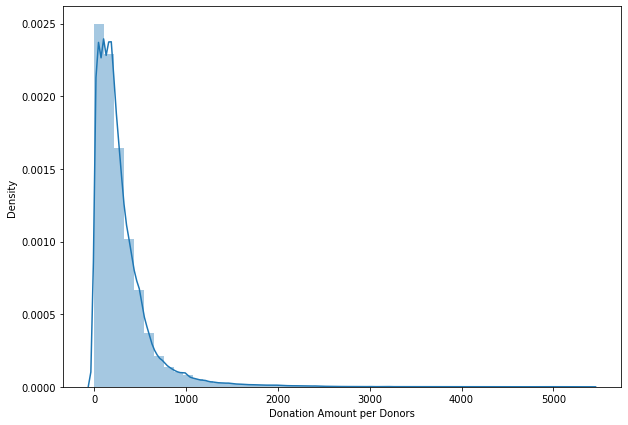

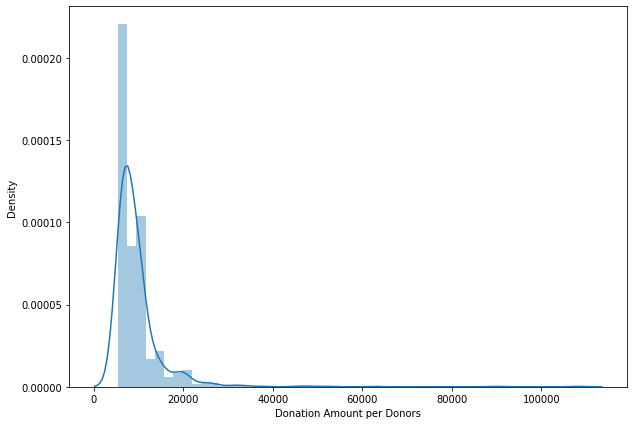

In [9]:
T=pd.Timedelta('100 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]

Grouped_data=sub_Data.groupby(["Project ID"]).sum()

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.001
y="Donation Amount"
q1 = Grouped_data[y].quantile(0)
q3 = Grouped_data[y].quantile(1-range)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Donors")
print(iqr.describe())

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.999
y="Donation Amount"
q1 = Grouped_data[y].quantile(range)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Donors")
print(iqr.describe())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count    872286.000000
mean        312.649904
std         346.731548
min           0.050000
25%         111.000000
50%         223.560000
75%         395.000000
max        5567.670000
Name: Donation Amount, dtype: float64
count       874.000000
mean       9709.026396
std        6889.605437
min        5571.400000
25%        6713.847500
50%        7864.555000
75%       10001.320000
max      108248.300000
Name: Donation Amount, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



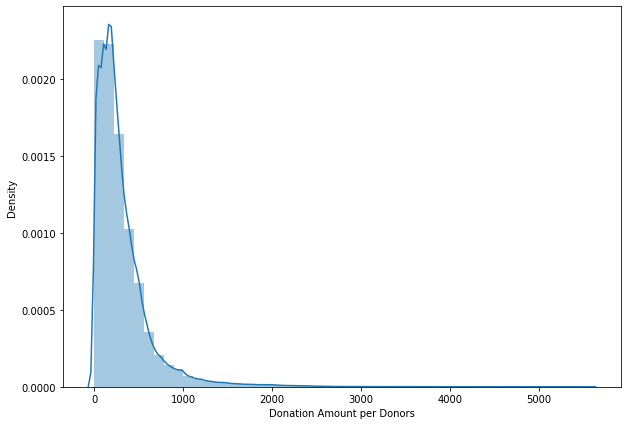

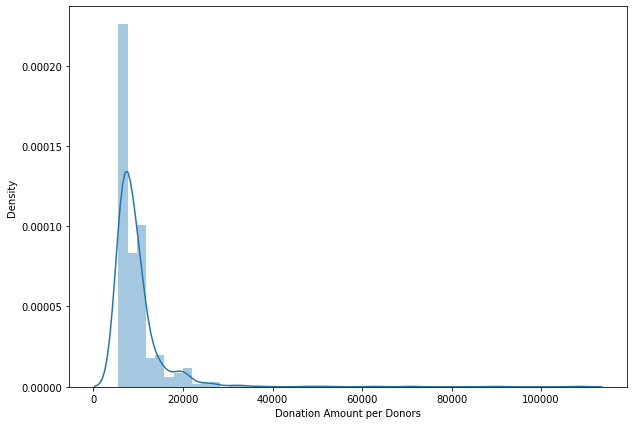

In [10]:
T=pd.Timedelta('180 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]

Grouped_data=sub_Data.groupby(["Project ID"]).sum()

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.001
y="Donation Amount"
q1 = Grouped_data[y].quantile(0)
q3 = Grouped_data[y].quantile(1-range)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Donors")
print(iqr.describe())

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.999
y="Donation Amount"
q1 = Grouped_data[y].quantile(range)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Donors")
print(iqr.describe())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count    869931.000000
mean        310.697002
std         344.088613
min           0.050000
25%         110.000000
50%         221.880000
75%         393.440000
max        5452.510000
Name: Donation Amount, dtype: float64
count       871.000000
mean       9676.874650
std        6851.886644
min        5476.890000
25%        6677.665000
50%        7849.110000
75%       10000.000000
max      108248.300000
Name: Donation Amount, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



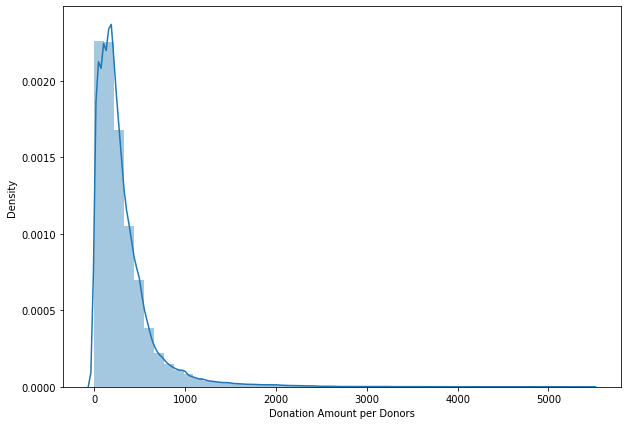

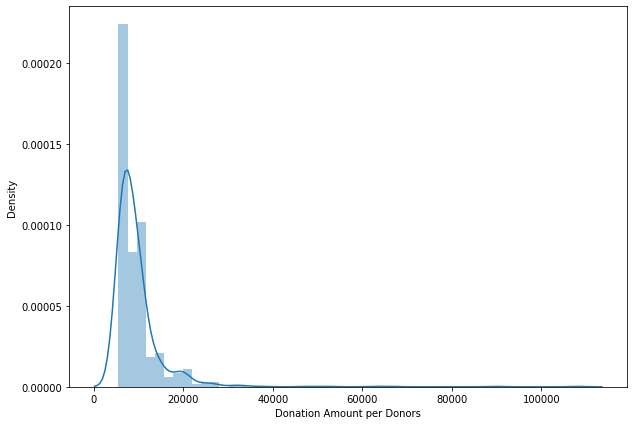

In [18]:
T=pd.Timedelta('120 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]

Grouped_data=sub_Data.groupby(["Project ID"]).sum()

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.001
y="Donation Amount"
q1 = Grouped_data[y].quantile(0)
q3 = Grouped_data[y].quantile(1-range)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Donors")
print(iqr.describe())

f, axes = plt.subplots(1, 1,figsize=(10,7))
range=0.999
y="Donation Amount"
q1 = Grouped_data[y].quantile(range)
q3 = Grouped_data[y].quantile(1)
mask = Grouped_data[y].between(q1, q3, inclusive=True)
iqr = Grouped_data.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y + " per Donors")
print(iqr.describe())

In [19]:
Grouped_data

,Donation Amount
Project ID,
000009891526c0ade7180f8423792063,288.37
00000ce845c00cbf0686c992fc369df4,485.00
00002d44003ed46b066607c5455a999a,672.92
00002eb25d60a09c318efbd0797bffb5,680.28
0000300773fe015f870914b42528541b,282.60
...,...
ffff8bee61b72c484b10e43aa9e35bc9,268.96
ffff98098650c5e07fa7f40030fbe9e2,509.27
ffff9bb21699f79266cc7cbc208890a0,150.00


In [12]:
Data["Project Duration"]=Data.loc[:,"Project Expiration Date"]-Data.loc[:,"Project Posted Date"]
Data.head()

,Unnamed: 0,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Donor City,Donor State,Donor Is Teacher,Donor Zip,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District,Teacher Prefix,Teacher First Project Posted Date,Number of dates since posted,Project Duration
0,0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,West Jordan,Utah,No,840,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19,102 days 13:15:57,122 days
1,1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23,Riverton,Utah,Yes,840,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19,24 days 20:05:23,122 days
2,2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46,Riverton,Utah,No,840,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19,24 days 14:08:46,122 days
3,3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04,Phoenix,Arizona,No,850,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19,2 days 10:23:04,122 days
4,4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38,Salt Lake City,Utah,Yes,841,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19,4 days 01:23:38,122 days


In [13]:
sub_Data=Data.loc[:,["Project ID","Project Duration","Project Posted Date",	"Project Expiration Date"]]
Grouped_data=sub_Data.groupby(["Project ID"]).max()
T=pd.Timedelta('0 days')
sub_data=Grouped_data[Grouped_data["Project Duration"] > T]
sub_data.describe()

,Project Duration
count,873155
mean,116 days 15:12:30.955319932
std,15 days 05:31:20.524279096
min,1 days 00:00:00
25%,118 days 00:00:00
50%,120 days 00:00:00
75%,121 days 00:00:00
max,489 days 00:00:00


In [16]:
sub_data

,Project Duration,Project Posted Date,Project Expiration Date
Project ID,,,
000009891526c0ade7180f8423792063,122 days,2016-05-13,2016-09-12
00000ce845c00cbf0686c992fc369df4,27 days,2013-02-02,2013-03-01
00002d44003ed46b066607c5455a999a,93 days,2017-06-20,2017-09-21
00002eb25d60a09c318efbd0797bffb5,120 days,2016-04-29,2016-08-27
0000300773fe015f870914b42528541b,122 days,2018-03-05,2018-07-05
...,...,...,...
ffff8bee61b72c484b10e43aa9e35bc9,122 days,2017-06-12,2017-10-12
ffff98098650c5e07fa7f40030fbe9e2,115 days,2016-09-01,2016-12-25
ffff9bb21699f79266cc7cbc208890a0,122 days,2017-05-26,2017-09-25


In [14]:
sub_data.dtypes

Project Duration           timedelta64[ns]
Project Posted Date         datetime64[ns]
Project Expiration Date     datetime64[ns]
dtype: object

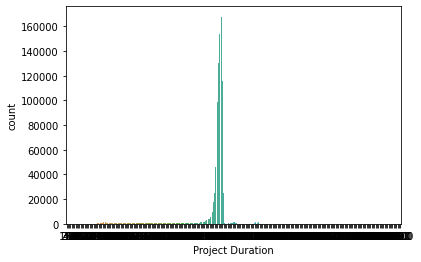

In [15]:
Duration_Table=sub_data.loc[:,["Project Duration"]]/np.timedelta64(1, 'D')
ax = sns.countplot(x="Project Duration", data=Duration_Table)